In [6]:
from aisynphys.database import default_db as db
from sqlalchemy import and_, alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

In [30]:
#look for correlations between the presyn intrinsic properties and the synaptic properties.
intrin_syn_query =db.query(db.Pair, db.Cell, db.Experiment, db.Dynamics, db.Synapse, db.Intrinsic) \
    .join(db.Cell, db.Pair.pre_cell_id==db.Cell.id) \
    .join(db.Experiment, db.Experiment.id==db.Cell.experiment_id) \
    .join(db.Dynamics, db.Dynamics.pair_id==db.Pair.id) \
    .join(db.Synapse, db.Synapse.pair_id == db.Pair.id) \
    .join(db.Intrinsic, db.Intrinsic.cell_id==db.Pair.pre_cell_id) \
    .filter(db.Synapse.synapse_type == 'in').all()

In [31]:
print(len(intrin_syn_query))

1437


In [32]:
intrinsic_list=[]
bufferDict={}

In [33]:
for rec in intrin_syn_query:
    bufferDict['cell_id']=rec[1].id
    bufferDict['cre']=rec[1].cre_type
    bufferDict['rheobase']=rec[5].rheobase
    bufferDict['fi_slope']=rec[5].fi_slope
    bufferDict['Ri']=rec[5].input_resistance
    bufferDict['sag']=rec[5].sag
    bufferDict['adaptation_index']=rec[5].adaptation_index
    bufferDict['upstroke_downstroke']=rec[5].ap_upstroke_downstroke_ratio
    bufferDict['width']=rec[5].ap_width
    bufferDict['upstroke']=rec[5].ap_upstroke
    bufferDict['downstroke']=rec[5].ap_downstroke
    bufferDict['threshold_v']=rec[5].ap_threshold_v
    bufferDict['peak_deltav']=rec[5].ap_peak_deltav
    bufferDict['fast_trough_deltav']=rec[5].ap_fast_trough_deltav
    bufferDict['chirp_peak_freq']=rec[5].chirp_peak_freq
    bufferDict['chirp_3db_freq']=rec[5].chirp_3db_freq
    bufferDict['chirp_peak_ratio']=rec[5].chirp_peak_ratio
    bufferDict['isi_adapt_ratio']=rec[5].isi_adapt_ratio
    bufferDict['upstroke_adapt_ratio']=rec[5].upstroke_adapt_ratio
    bufferDict['downstroke_adapt_ratio']=rec[5].downstroke_adapt_ratio
    bufferDict['width_adapt_ratio']=rec[5].width_adapt_ratio
    bufferDict['threshold_v_adapt_ratio']=rec[5].threshold_v_adapt_ratio
    bufferDict['latency']=rec[4].latency
    bufferDict['psp_amplitude']=rec[4].psp_amplitude
    bufferDict['psp_rise_time']=rec[4].psp_rise_time
    bufferDict['psp_decay_tau']=rec[4].psp_decay_tau
    bufferDict['psc_amplitude']=rec[4].psc_amplitude
    bufferDict['psc_rise_time']=rec[4].psc_rise_time
    bufferDict['psc_decay_tau']=rec[4].psc_decay_tau
    bufferDict['paired_pulse_ratio_50hz']=rec[3].paired_pulse_ratio_50hz
    bufferDict['stp_initial_50hz']=rec[3].stp_initial_50hz
    bufferDict['stp_initial_50hz_std']=rec[3].stp_initial_50hz_std
    bufferDict['stp_recovery_250ms']=rec[3].stp_recovery_250ms
    bufferDict['pulse_amp_90th_percentile']=rec[3].pulse_amp_90th_percentile
    bufferDict['noise_amp_90th_percentile']=rec[3].noise_amp_90th_percentile
#   bufferDict['avg_firing_rate']=rec[1].avg_firing_rate
    intrinsic_list.append(bufferDict.copy())
    bufferDict.clear()

In [34]:
df = pd.DataFrame(intrinsic_list)

In [35]:
corr_table = df.corr()

C:\ProgramData\Miniconda3\envs\aisynphys\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


r2= 0.1864929637802805 p= 1.262702982519189e-25


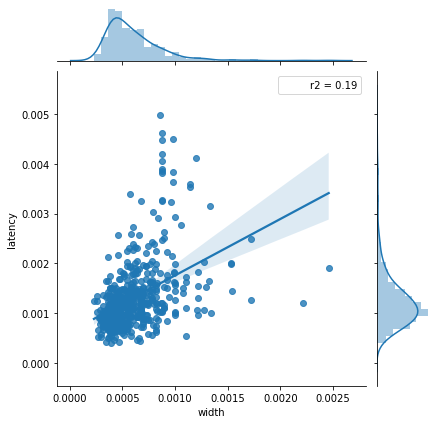

In [36]:

width_and_latency = df[['width', 'latency']]
width_and_latency=width_and_latency.dropna(how="any")
# ax = sns.lmplot(x="tau", y="psp_rise_time", data=Tau_and_rise)
# plt.xlim(0, 0.2)
width_and_latency = width_and_latency[width_and_latency['latency']<=0.005]
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
def p(x,y):
    return stats.pearsonr(x, y)[1] ** 2
sns.jointplot(x="width", y="latency", data=width_and_latency, kind="reg", stat_func=r2 )

# sns.jointplot(x="tau", y="psp_rise_time", data=Tau_and_rise, kind="reg")

r,p=stats.pearsonr(x=width_and_latency["width"], y=width_and_latency["latency"])
print('r2=',r**2,'p=',p)

In [16]:
corr_table = corr_table.replace(1.000000, np.nan)



In [39]:
sub_corr_table = corr_table.loc['latency': , :'threshold_v_adapt_ratio']

In [40]:
sub_corr_table.style.highlight_max(color='yellow').highlight_min(color = 'lightblue')


,cell_id,rheobase,fi_slope,Ri,sag,adaptation_index,upstroke_downstroke,width,upstroke,downstroke,threshold_v,peak_deltav,fast_trough_deltav,chirp_peak_freq,chirp_3db_freq,chirp_peak_ratio,isi_adapt_ratio,upstroke_adapt_ratio,downstroke_adapt_ratio,width_adapt_ratio,threshold_v_adapt_ratio
latency,-0.0573361,-0.269477,-0.250505,0.148537,-0.114336,0.0929586,0.362324,0.447061,-0.115027,0.286852,-0.102263,0.24442,0.182261,-0.0515501,-0.328738,0.0106029,0.0163877,-0.177961,-0.229875,0.177585,0.000854946
psp_amplitude,0.0595958,-0.114086,-0.0105587,0.164206,0.0495194,-0.00483485,0.0749203,0.0343549,0.00544649,0.0352821,-0.0457532,-0.000976581,-0.0118088,0.0563226,-0.135147,0.04731,0.0333159,-0.0832692,-0.0984307,0.0986869,-0.0111911
psp_rise_time,0.119274,-0.262213,-0.331148,0.105204,-0.0431269,0.164612,0.348388,0.377726,-0.134243,0.296244,-0.0999556,0.203792,0.244392,-0.00269029,-0.324073,0.126099,0.0300206,-0.165764,-0.141793,0.0889085,-0.0611258
psp_decay_tau,0.0956475,-0.0797953,-0.203259,0.0397747,0.031789,0.0419414,0.112045,0.132988,-0.102332,0.134275,-0.0923212,0.0544453,0.136151,-0.0305652,-0.072143,-0.0364461,0.0362214,-0.00212888,0.0215536,-0.0376094,-0.00600458
psc_amplitude,-0.0442556,0.225016,0.115586,-0.223802,0.0532146,-0.0373815,-0.166441,-0.162012,0.0565242,-0.109586,0.0832027,-0.0376073,-0.0595515,0.0702476,0.16296,0.00559494,0.00953704,0.145992,0.153258,-0.133284,0.0319455
psc_rise_time,0.0395306,-0.238433,-0.257757,0.143845,0.0105498,0.175878,0.287856,0.304373,-0.0588161,0.238857,-0.0469711,0.205165,0.171484,-0.031484,-0.344481,0.0598911,0.171829,-0.195734,-0.182581,0.145901,0.0789388
psc_decay_tau,0.00422013,-0.0951915,-0.122606,0.0124715,0.0158106,0.0418843,0.120431,0.131436,-0.00299812,0.0713056,-0.0296852,0.0792189,0.026806,-0.032011,-0.0837023,0.00805224,0.0455057,-0.0658453,-0.0550423,0.0494429,-0.0368129
paired_pulse_ratio_50hz,0.0493714,-0.00601436,-0.191528,-0.124543,-0.0706867,0.325095,0.153289,0.0488431,-0.07917,0.168613,0.0104394,-0.0130951,0.258518,-0.222977,0.0571726,-0.17077,0.292034,-0.159841,-0.223064,0.172977,-0.162553
stp_initial_50hz,0.0408006,-0.167286,-0.180857,0.0832296,-0.105774,0.171175,0.231303,0.223065,-0.100897,0.20088,-0.111397,0.0524089,0.183362,-0.018185,-0.116525,0.0717547,0.115699,-0.145072,-0.154842,0.140999,-0.0409767
stp_initial_50hz_std,0.0358909,-0.149407,-0.000543297,0.181398,0.0109281,0.0379182,0.0611401,0.0481457,-0.00070016,0.0399129,-0.0247146,0.0490179,0.0159667,-0.0525014,-0.138739,0.00827992,-0.0494996,-0.063582,-0.0886234,0.0744963,0.0185189


In [41]:
inhib_list=['sst','vip', 'pvalb']
sst_pv_vip_df=df[df['cre'].isin(inhib_list)]

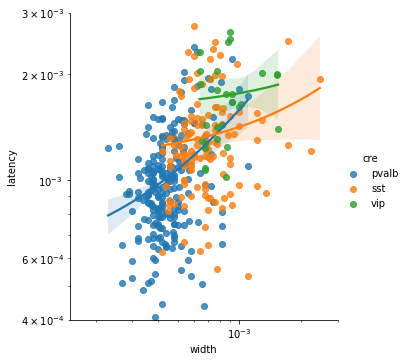

In [42]:
ax = sns.lmplot(x="width", y="latency", data=sst_pv_vip_df, hue='cre')
ax.set(ylim=(0.0004, 0.003))
ax.set(xlim=(0.00015, 0.003))
ax.set(xscale="log", yscale="log")



In [43]:
df.head()

,cell_id,cre,rheobase,fi_slope,Ri,sag,adaptation_index,upstroke_downstroke,width,upstroke,...,psp_decay_tau,psc_amplitude,psc_rise_time,psc_decay_tau,paired_pulse_ratio_50hz,stp_initial_50hz,stp_initial_50hz_std,stp_recovery_250ms,pulse_amp_90th_percentile,noise_amp_90th_percentile
0,12600,pvalb,1.400000e-10,9.180272e-13,8.725435e+07,0.090151,0.065123,1.599992,0.00038,309.981555,...,0.009326,NaN,NaN,NaN,NaN,-0.065043,1.068624,0.019877,-0.000241,-0.000112
1,12602,pvalb,3.600000e-10,1.250000e-12,1.004442e+08,0.034802,-0.001039,1.440984,0.00032,323.260024,...,0.012173,4.847558e-12,0.001154,0.004610,0.52125,-0.542491,0.332721,-0.253644,-0.000618,-0.000089
2,12368,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010685,3.202673e-12,0.001453,0.002223,NaN,NaN,NaN,0.100562,-0.000374,-0.000162
3,24507,pvalb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.228656e-12,0.001266,0.001550,NaN,NaN,NaN,NaN,NaN,NaN
4,24507,pvalb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.435796e-12,0.001005,0.002378,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
inhib_list=['pvalb']
pvalb_only=df[df['cre'].isin(inhib_list)]

In [45]:
pvalb_only.head()

,cell_id,cre,rheobase,fi_slope,Ri,sag,adaptation_index,upstroke_downstroke,width,upstroke,...,psp_decay_tau,psc_amplitude,psc_rise_time,psc_decay_tau,paired_pulse_ratio_50hz,stp_initial_50hz,stp_initial_50hz_std,stp_recovery_250ms,pulse_amp_90th_percentile,noise_amp_90th_percentile
0,12600,pvalb,1.400000e-10,9.180272e-13,8.725435e+07,0.090151,0.065123,1.599992,0.00038,309.981555,...,0.009326,NaN,NaN,NaN,NaN,-0.065043,1.068624,0.019877,-0.000241,-0.000112
1,12602,pvalb,3.600000e-10,1.250000e-12,1.004442e+08,0.034802,-0.001039,1.440984,0.00032,323.260024,...,0.012173,4.847558e-12,0.001154,0.004610,0.52125,-0.542491,0.332721,-0.253644,-0.000618,-0.000089
3,24507,pvalb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.228656e-12,0.001266,0.001550,NaN,NaN,NaN,NaN,NaN,NaN
4,24507,pvalb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.435796e-12,0.001005,0.002378,NaN,NaN,NaN,NaN,NaN,NaN
5,24494,pvalb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020283,3.435101e-12,0.002057,0.022834,NaN,0.017241,0.823560,-0.032885,-0.000217,-0.000124


In [46]:
pvalb_only_corr=pvalb_only.corr(min_periods=10)
pvalb_only_corr = pvalb_only_corr.replace(1.000000, np.nan)
pvalb_only_corr_subset = pvalb_only_corr.loc['latency': , :'threshold_v_adapt_ratio']
pvalb_only_corr_subset.style.highlight_max(color='yellow').highlight_min(color = 'lightblue')

,cell_id,rheobase,fi_slope,Ri,sag,adaptation_index,upstroke_downstroke,width,upstroke,downstroke,threshold_v,peak_deltav,fast_trough_deltav,chirp_peak_freq,chirp_3db_freq,chirp_peak_ratio,isi_adapt_ratio,upstroke_adapt_ratio,downstroke_adapt_ratio,width_adapt_ratio,threshold_v_adapt_ratio
latency,-0.00713245,-0.258403,-0.0143124,0.0947919,0.0186889,0.10479,0.20683,0.3885,-0.075784,0.159686,-0.071304,0.133736,0.0490201,-0.150523,-0.0644879,-0.0937425,-0.105881,-0.0627943,-0.149901,0.0198823,0.0829985
psp_amplitude,0.119816,0.0324329,0.00326011,0.0324506,0.123974,-0.0649414,-0.101268,-0.158722,0.0715267,-0.0716324,-0.065583,0.00144777,-0.0809469,0.110691,-0.0928078,0.083477,-0.0302261,-0.100632,-0.0623984,0.0754277,0.00159862
psp_rise_time,0.302494,-0.0586522,-0.190473,0.00794353,-0.030576,-0.051722,0.1384,0.187385,-0.0709625,0.104534,-0.054033,0.0807254,0.192705,-0.115622,-0.138699,0.192576,0.00639154,-0.116096,-0.130197,0.127151,-0.104265
psp_decay_tau,0.15619,0.0133071,-0.13415,0.178142,0.0492506,0.0136579,0.0291509,0.0534468,-0.0879967,0.0977855,-0.0564122,0.00202834,0.123029,-0.0370436,0.108819,-0.12462,0.141908,-0.0845541,-0.0797511,0.109976,-0.0738005
psc_amplitude,-0.13314,0.0513562,0.12298,-0.00163375,0.0681423,0.0804865,-0.0128557,0.0128867,-0.0725689,0.0567525,0.132221,-0.101478,-0.0995083,0.0198069,-0.0482747,0.0227968,-0.0499064,0.149421,0.133018,-0.0811611,0.0162533
psc_rise_time,0.18433,0.00245242,-0.0940971,0.0239604,-0.0886452,-0.0315022,0.215952,0.249438,-0.107845,0.155929,0.0798442,0.0350141,0.203938,-0.0491033,0.134814,-0.121142,-0.0303359,-0.0554572,-0.0710885,0.0130944,0.307609
psc_decay_tau,0.18988,0.0269514,-0.0175896,-0.0933285,0.0340066,0.0508594,-0.0196027,-0.0191278,-0.00115717,0.00612241,-0.051922,0.011659,0.016007,-0.00269753,0.0503916,-0.0451425,0.0664202,-0.126722,-0.112716,0.124764,-0.0528213
paired_pulse_ratio_50hz,0.0681196,0.115966,-0.0487301,0.00941666,0.0746252,-0.0449706,0.0370557,0.210069,-0.183762,0.184374,0.0963747,-0.0937253,0.0624688,-0.288849,-0.111288,-0.312903,-0.132504,-0.0153886,-0.0585493,0.0500427,-0.138956
stp_initial_50hz,0.0822888,0.0457823,-0.0538438,-0.0503618,-0.083284,-0.00302695,0.0255472,0.0361126,-0.0947955,0.0897482,0.0266731,-0.0927707,0.0246491,-0.117361,-0.270399,0.0961677,-0.0659602,0.0321264,0.0156716,-0.0423637,0.0356677
stp_initial_50hz_std,0.0535785,-0.000700609,0.0468918,0.0835608,0.0869329,-0.0421958,-0.0525954,-0.137577,0.0505309,-0.059284,-0.0562233,0.00359612,0.0278654,-0.00298615,-0.188961,0.167714,-0.0576256,0.0528002,0.0613972,-0.0593348,0.0824672


In [47]:
pvalb_only_corr_subset.abs().max().sort_values(ascending=False)

chirp_peak_ratio           0.424181
width                      0.388500
threshold_v_adapt_ratio    0.307609
cell_id                    0.302494
chirp_peak_freq            0.288849
chirp_3db_freq             0.270399
rheobase                   0.258403
upstroke_downstroke        0.215952
fast_trough_deltav         0.203938
fi_slope                   0.190473
downstroke                 0.184374
upstroke                   0.183762
Ri                         0.178142
peak_deltav                0.162988
downstroke_adapt_ratio     0.149901
upstroke_adapt_ratio       0.149421
isi_adapt_ratio            0.141908
threshold_v                0.132221
width_adapt_ratio          0.127151
sag                        0.123974
adaptation_index           0.104790
dtype: float64

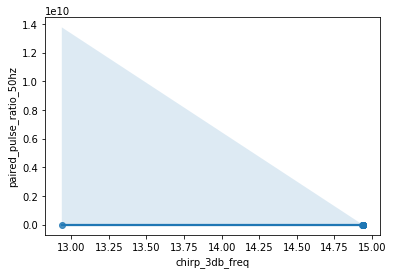

In [48]:
ax = sns.regplot(x="chirp_3db_freq", y="paired_pulse_ratio_50hz", data=pvalb_only)


[None, None]

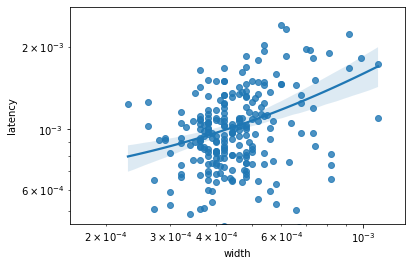

In [49]:
ax = sns.regplot(x="width", y="latency", data=pvalb_only)
ax.set(ylim=(0.00045, 0.0028))
ax.set(xlim=(0.00016, 0.0013))
ax.set(xscale="log", yscale="log")

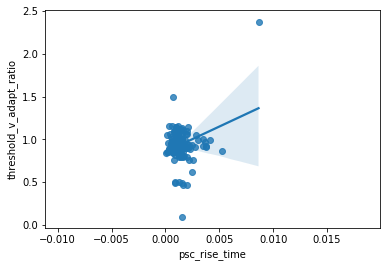

In [50]:
ax = sns.regplot(x="psc_rise_time", y="threshold_v_adapt_ratio", data=pvalb_only)


In [51]:
inhib_list=['sst']
sst_only=df[df['cre'].isin(inhib_list)]
sst_only_corr=sst_only.corr(min_periods=10)
sst_only_corr = sst_only_corr.replace(1.000000, np.nan)
sst_only_corr_subset = sst_only_corr.loc['latency': , :'threshold_v_adapt_ratio']
sst_only_corr_subset.style.highlight_max(color='yellow').highlight_min(color = 'lightblue')

,cell_id,rheobase,fi_slope,Ri,sag,adaptation_index,upstroke_downstroke,width,upstroke,downstroke,threshold_v,peak_deltav,fast_trough_deltav,chirp_peak_freq,chirp_3db_freq,chirp_peak_ratio,isi_adapt_ratio,upstroke_adapt_ratio,downstroke_adapt_ratio,width_adapt_ratio,threshold_v_adapt_ratio
latency,-0.101137,-0.199536,-0.0830114,0.240467,-0.184885,-0.199448,0.140754,0.16779,-0.0590127,0.100171,-0.138305,0.165089,0.266378,-0.0605875,-0.24351,-0.0260112,-0.147791,-0.0602209,-0.144795,0.104624,0.0508239
psp_amplitude,-0.0242554,-0.225504,0.242071,0.246309,-0.142165,-0.120918,0.0050072,-0.0254783,-0.0806942,0.0642481,0.135515,-0.174945,-0.134794,0.0940772,-0.104481,0.0555369,-0.0420251,0.149256,0.0977134,-0.0337542,0.0919397
psp_rise_time,0.217214,0.00536755,-0.0325327,-0.00524896,0.0608438,-0.0380261,0.14558,0.104366,-0.0783699,0.143621,-0.0774855,-0.00560409,0.163877,0.199212,0.138475,0.214982,-0.0598612,0.00842307,0.0661341,-0.153256,-0.0337582
psp_decay_tau,0.144647,-0.0234844,-0.0760924,-0.01222,0.0926244,-0.0600933,0.0867421,0.108155,-0.0824895,0.0975465,-0.0431092,-0.0117094,0.121061,0.080723,0.140007,0.0694687,-0.0352693,0.0151228,0.0832096,-0.13268,-0.0523212
psc_amplitude,0.0664854,0.158707,-0.063474,-0.264301,0.0332241,0.199431,-0.0696125,-0.045051,0.146004,-0.160588,-0.0363954,0.183346,0.0240854,-0.151476,-0.134769,-0.0981376,0.125696,-0.046666,0.0132254,-0.0900107,-0.0623712
psc_rise_time,0.110081,-0.0561861,-0.048051,-0.0309938,0.210219,0.0900403,-0.0617738,-0.0923332,0.0865775,-0.0914109,0.0150597,0.0306488,-0.0441017,-0.0604678,-0.257875,-0.0269121,0.113068,0.048218,-0.0211744,-0.0713646,0.0349897
psc_decay_tau,0.0579965,0.0010607,0.0167347,-0.0616799,0.059678,-0.101589,0.127737,-0.02779,0.0800123,-0.0219679,0.00220616,0.0502594,0.0898522,-0.0643071,0.134027,-0.0594728,-0.0972752,0.0724453,0.0687417,-0.0385165,-0.0675231
paired_pulse_ratio_50hz,-0.0832623,-0.147569,-0.252588,-0.132333,-0.325679,0.387626,0.487056,0.01688,-0.0172036,0.162011,-0.0509769,-0.105258,0.128953,nan,nan,nan,0.818007,0.0741826,-0.158096,-0.0660679,0.026792
stp_initial_50hz,-0.0394892,-0.154515,-0.0167774,0.0537176,-0.183111,0.107243,0.0918893,0.0472341,0.00292708,0.0442139,-0.253877,0.0272573,0.118812,0.37382,0.162378,0.372557,0.156808,-0.0245499,0.00240277,0.0498801,-0.060079
stp_initial_50hz_std,-0.0431424,-0.266654,0.162425,0.251281,-0.115887,-0.0527509,-0.0101819,-0.00962433,0.0209427,0.0106479,0.0600194,0.0538329,-0.178851,-0.0439801,-0.225442,-0.0830855,-0.0898653,-0.0702424,-0.144444,0.167296,0.0104943


In [52]:
sst_only_corr_subset.max()

cell_id                    0.217214
rheobase                   0.158707
fi_slope                   0.242071
Ri                         0.251281
sag                        0.210219
adaptation_index           0.387626
upstroke_downstroke        0.487056
width                      0.290482
upstroke                   0.146004
downstroke                 0.244672
threshold_v                0.194656
peak_deltav                0.183346
fast_trough_deltav         0.318480
chirp_peak_freq            0.400706
chirp_3db_freq             0.162378
chirp_peak_ratio           0.372557
isi_adapt_ratio            0.818007
upstroke_adapt_ratio       0.149256
downstroke_adapt_ratio     0.097713
width_adapt_ratio          0.167296
threshold_v_adapt_ratio    0.103071
dtype: float64

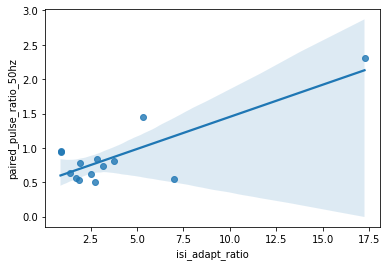

In [53]:
ax = sns.regplot(x="isi_adapt_ratio", y="paired_pulse_ratio_50hz", data=sst_only)

#sst_only.plot.scatter('isi_adapt_ratio', 'paired_pulse_ratio_50hz')

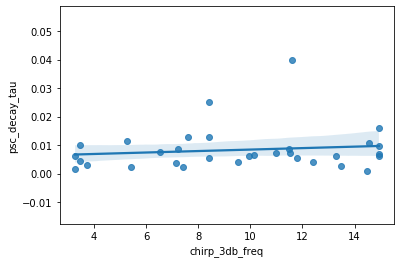

In [54]:
ax = sns.regplot(x="chirp_3db_freq", y="psc_decay_tau", data=sst_only)


In [55]:
inhib_list=['vip']
vip_only=df[df['cre'].isin(inhib_list)]
vip_only_corr=vip_only.corr(min_periods=10)
vip_only_corr = vip_only_corr.replace(1.000000, np.nan)
vip_only_corr_subset = vip_only_corr.loc['latency': , :'threshold_v_adapt_ratio']
vip_only_corr_subset.style.highlight_max(color='yellow').highlight_min(color = 'lightblue')

,cell_id,rheobase,fi_slope,Ri,sag,adaptation_index,upstroke_downstroke,width,upstroke,downstroke,threshold_v,peak_deltav,fast_trough_deltav,chirp_peak_freq,chirp_3db_freq,chirp_peak_ratio,isi_adapt_ratio,upstroke_adapt_ratio,downstroke_adapt_ratio,width_adapt_ratio,threshold_v_adapt_ratio
latency,0.0670324,-0.141509,-0.0557691,0.151209,-0.292869,0.0952838,0.434575,0.0938542,0.368155,-0.158206,-0.232157,0.498084,0.0190713,0.797162,0.366566,0.828782,0.207208,-0.417808,-0.39693,0.372872,-0.122787
psp_amplitude,0.183356,0.049843,0.105076,0.368083,0.148358,-0.199664,-0.0197033,-0.0711589,-0.154537,0.180233,-0.0367224,-0.0757416,0.213211,nan,nan,nan,-0.0143532,0.245352,0.227873,-0.215253,0.277471
psp_rise_time,-0.0508923,0.169632,0.096869,0.160288,-0.214549,0.0913524,0.102006,-0.0281531,-0.230076,0.290697,-0.171878,-0.117603,0.245329,-0.0548997,-0.000575171,0.0019387,-0.130416,0.202597,0.189457,-0.178605,0.246615
psp_decay_tau,0.159064,0.10163,-0.182192,-0.0427815,-0.0399649,0.00206596,0.22074,0.191816,-0.391316,0.4511,-0.301799,-0.197556,0.473209,-0.0436568,-0.195517,-0.00374541,-0.141944,0.476639,0.339679,-0.364342,0.641188
psc_amplitude,0.193459,0.0466012,-0.143194,-0.332615,0.314157,-0.161106,-0.0351647,-0.221952,0.365921,-0.395585,-0.255203,0.363117,-0.0395796,0.553826,0.288403,0.699352,0.455768,-0.370858,-0.459991,0.451139,-0.209242
psc_rise_time,0.159702,0.0425552,0.176895,0.11563,-0.28077,0.0703169,0.153467,-0.106569,0.375412,-0.292474,-0.112554,0.441952,0.0963153,0.728256,0.698165,0.661029,0.399744,-0.328292,-0.203738,0.254225,-0.317255
psc_decay_tau,-0.0966133,0.238989,0.195588,0.274426,-0.200633,0.0247387,-0.141358,0.176487,-0.270754,0.255898,0.320884,-0.22148,-0.105213,0.481755,0.278489,0.440158,-0.0713439,0.137489,0.23407,-0.169801,0.0229721
paired_pulse_ratio_50hz,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
stp_initial_50hz,-0.0630499,-0.0340546,-0.121004,-0.174036,-0.278177,0.294015,0.33668,0.30657,0.100386,0.113831,-0.143365,0.0431013,-0.178639,nan,nan,nan,0.263753,-0.40428,-0.243035,0.267152,-0.200167
stp_initial_50hz_std,-0.20593,0.199291,0.0655503,0.276052,0.192294,-0.185566,-0.328084,-0.140058,-0.272212,0.117628,0.170692,-0.206757,0.244114,nan,nan,nan,-0.239634,0.478078,0.436772,-0.426422,0.36574


In [56]:
vip_only_corr_subset.abs().max().sort_values(ascending=False)
# pvalb_only_corr_subset.abs().max().sort_values(ascending=False)

chirp_peak_ratio           0.828782
chirp_peak_freq            0.797162
chirp_3db_freq             0.698165
threshold_v_adapt_ratio    0.641188
peak_deltav                0.498084
upstroke_adapt_ratio       0.478078
fast_trough_deltav         0.473209
downstroke_adapt_ratio     0.459991
upstroke_downstroke        0.455987
isi_adapt_ratio            0.455768
width_adapt_ratio          0.451139
downstroke                 0.451100
threshold_v                0.417509
upstroke                   0.393652
Ri                         0.368083
adaptation_index           0.350382
fi_slope                   0.328477
sag                        0.314157
width                      0.306570
rheobase                   0.238989
cell_id                    0.205930
dtype: float64

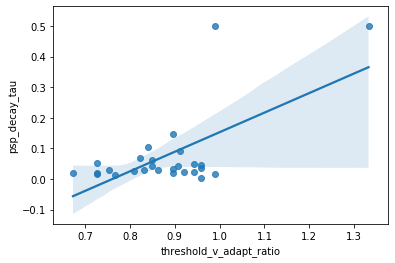

In [57]:
ax = sns.regplot(x="threshold_v_adapt_ratio", y="psp_decay_tau", data=vip_only)


#vip_only.plot.scatter('threshold_v_adapt_ratio', 'psp_decay_tau')

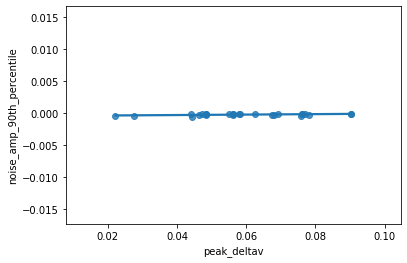

In [58]:
ax = sns.regplot(x="peak_deltav", y="noise_amp_90th_percentile", data=vip_only)

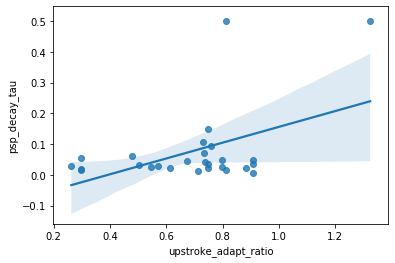

In [59]:
ax = sns.regplot(x="upstroke_adapt_ratio", y="psp_decay_tau", data=vip_only)